In [1]:
from grid import Grid
import numpy as np
from agent import Agent
import time
import pickle
from matplotlib import pyplot as plt

In [2]:
def create_test_grids(amount=1000, size=5):
    grids = []
    for j in range(amount):
        grids.append(Grid(size, random=True))
    with open('test_grids.pickle', 'wb') as fil:
        pickle.dump(grids, fil)


In [3]:
create_test_grids(100)


In [4]:
def load_test_grids():
    with open('test_grids.pickle', 'rb') as fil:
        grids = pickle.load(fil)
    return grids

In [5]:
grids = load_test_grids()

In [6]:
def test_MC_first_visit(testgrids, iterations=100):
    #reward_dist = {}
    rewards = []
    for testgrid in testgrids:
        a = Agent()
        Q, policy = a.mc_first_visit_control(testgrid.copy(), iterations) # Q value key is (self.agent_pos,self.train.pos,list(self.other_agents.positions)[0])
        grids, action_values, reward = a.run_final_policy(testgrid.copy(), Q)
        '''if reward not in reward_dist:
            reward_dist[reward] = 1
        else:
            reward_dist[reward] += 1'''
        rewards.append(reward)
        
    return np.mean(rewards)

In [9]:
iterations = [1,10,20, 30, 50, 70, 100,200, 500]
scores = []

for it in iterations:
    score = test_MC_first_visit(grids, it)
    print(it, score)
    scores.append(score)

1 -1.204
10 -0.45
20 -0.322
30 -0.285
50 -0.16
70 -0.162
100 -0.2
200 -0.144
500 -0.162


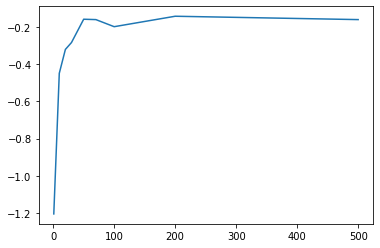

In [10]:
plt.plot(iterations, scores)